## 1-created_on: the date on which the property was listed or created.
## 2-operation: whether the property is for sale or for rent.
## 3-property_type: the type of property, such as apartment, house, or commercial property.
## 4-place_name: the name of the neighborhood or locality where the property is located.
## 5-place_with_parent_names: a hierarchical list of the names of the places where the property is located, from the smallest to the largest. For example, the list could be "Barrio Norte, Capital Federal, Buenos Aires, Argentina".
## 6-eonames_id: the ID of the location in the GeoNames database.
## 7-lat-lon: the latitude and longitude coordinates of the property.
## 8-lat: the latitude coordinate of the property.
## 9-lon: the longitude coordinate of the property.
## 10- price: the price of the property.
## 11- currency: the currency used to express the price.
## 12-price_aprox_local_currency: the price of the property in the local currency.
## 13-price_aprox_usd: the price of the property in US dollars.
## 14-surface_total_in_m2: the total surface area of the property in square meters.
## 15-surface_covered_in_m2: the covered surface area of the property in square meters.
## 16- price_usd_per_m2: the price of the property per square meter in US dollars.
## 17-price_per_m2: the price of the property per square meter in the local currency.
## 18-floor: the floor number of the property.
## 19-rooms: the number of rooms in the property.
## 20-expenses: additional expenses associated with the property, such as maintenance or utilities.
## 24-properati_url: the URL of the property listing on the Properati website.
## 25- description: a text description of the property.
## 26-title: the title of the property listing.
## 27-image_thumbnail: a URL to a thumbnail image of the property.

# Importing 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from pycaret.regression import *
#from pycaret.classification import *
#from pycaret.clustering import *
import plotly.express as px


# read data and combined

In [4]:
df1 = pd.read_csv('properati-MX-2016-11-01-properties-rent.csv')
df2 = pd.read_csv('properati-MX-2016-11-01-properties-sell.csv')
df_combined = pd.concat([df1, df2])
df_combined.to_csv('combined_file1.csv',index=False)

In [5]:
df=pd.read_csv('combined_file1.csv')


# preprocessing for data

In [6]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",20.61,-87.10,NaN,...,250.00,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",20.63,-87.08,2200.00,...,110.00,20.00,20.00,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",20.63,-87.08,19000.00,...,110.00,11.38,172.73,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",20.63,-87.07,10000.00,...,65.00,10.14,153.85,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",20.64,-87.08,30000.00,...,250.00,7.91,120.00,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat-lon                     156591 non-null  object 
 7   lat                         156591 non-null  float64
 8   lon                         156591 non-null  float64
 9   price                       185911 non-null  float64
 10  currency                    185911 non-null  object 
 11  price_aprox_local_currency  185911 non-null  float64
 12  price_aprox_usd             185911 non-null  float64
 13  surface_total_

In [8]:
pd.set_option('display.max_columns',None)
df


,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",20.61,-87.10,NaN,NaN,NaN,NaN,250.00,250.00,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",20.63,-87.08,2200.00,USD,41378.70,2200.00,110.00,110.00,20.00,20.00,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",20.63,-87.08,19000.00,ARS,23546.17,1251.89,110.00,110.00,11.38,172.73,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",20.63,-87.07,10000.00,ARS,12392.73,658.89,65.00,65.00,10.14,153.85,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",20.64,-87.08,30000.00,ARS,37178.19,1976.67,250.00,250.00,7.91,120.00,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188520,2016-10-31,sell,house,La Paz,|México|Baja California Sur|La Paz|,NaN,"24.1449619993,-110.3373348713",24.14,-110.34,130000.00,USD,2445105.00,130000.00,246.00,130.00,528.46,1000.00,NaN,NaN,NaN,http://la-paz-baja-california-sur.properati.co...,"<p>* La propiedad cuenta con 3 recámaras, 2 ba...",HERMOSA CASA FRACCIONAMIENTO JUAREZ (LA POSADA),https://thumbs-cf.properati.com/6/sqpYXMCYQ1yR...
188521,2016-10-31,sell,house,La Paz,|México|Baja California Sur|La Paz|,NaN,"24.0917019757,-110.3180873394",24.09,-110.32,535000.00,MXN,530160.07,28187.26,140.00,60.00,201.34,8916.67,NaN,NaN,NaN,http://la-paz-baja-california-sur.properati.co...,<p>casa de 2 recamaras con terreno amplio.tota...,casa misión de san Fernando,https://thumbs-cf.properati.com/3/VTZ1ofnuWV5r...
188522,2016-10-31,sell,apartment,Temozon Norte,|México|Yucatán|Mérida|Temozon Norte|,NaN,"21.065001,-89.6239875",21.07,-89.62,950000.00,MXN,941405.86,50052.15,0.00,63.00,NaN,15079.37,NaN,NaN,NaN,http://temozon-norte.properati.com.mx/re55_ven...,<p>ECO TEMOZÓN LUXURY SUITES<br></p><p>Es una ...,ECO TEMOZON LUXURY SUITES,https://thumbs-cf.properati.com/5/9LAeSx0VAKe-...
188523,2016-11-01,sell,house,Michoacán,|México|Chiapas|Jiquipilas|Michoacán|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.00,180.00,NaN,NaN,NaN,NaN,NaN,http://michoacan-jiquipilas.properati.com.mx/r...,<p>Casa nueva en Villas de San Antonio<br></p>...,Villas de San Antonio 1,https://thumbs-cf.properati.com/1/-mzye3xCs53_...


# droping unwanted columns

In [9]:
df.drop(["geonames_id","lat-lon","lat","lon","price_usd_per_m2","floor","rooms","expenses","properati_url","description","image_thumbnail","title","surface_total_in_m2"],inplace=True,axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   price                       185911 non-null  float64
 6   currency                    185911 non-null  object 
 7   price_aprox_local_currency  185911 non-null  float64
 8   price_aprox_usd             185911 non-null  float64
 9   surface_covered_in_m2       181082 non-null  float64
 10  price_per_m2                167355 non-null  float64
dtypes: float64(5), object(6)
memory usage: 15.8+ MB


In [11]:
df.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
price                          2614
currency                       2614
price_aprox_local_currency     2614
price_aprox_usd                2614
surface_covered_in_m2          7443
price_per_m2                  21170
dtype: int64

# fill NULLS

In [12]:
df.dropna(inplace=True,axis=0)

In [13]:
df.shape

(167355, 11)

In [14]:
df.to_csv("final data.csv")

In [15]:
mode=df['price'].mode()
df['price'] =  df['price'].fillna(mode[0])
mode=df['currency'].mode()
df['currency'] =  df['currency'].fillna(mode[0])

In [16]:
mode=df['price_aprox_local_currency'].mode()
df['price_aprox_local_currency'] =  df['price_aprox_local_currency'].fillna(mode[0])
mode=df['price_aprox_usd'].mode()
df['price_aprox_usd'] =  df['price_aprox_usd'].fillna(mode[0])

In [17]:
mode=df['surface_covered_in_m2'].mode()
df['surface_covered_in_m2'] =  df['surface_covered_in_m2'].fillna(mode[0])

In [18]:
df.isnull().sum()

created_on                    0
operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_covered_in_m2         0
price_per_m2                  0
dtype: int64

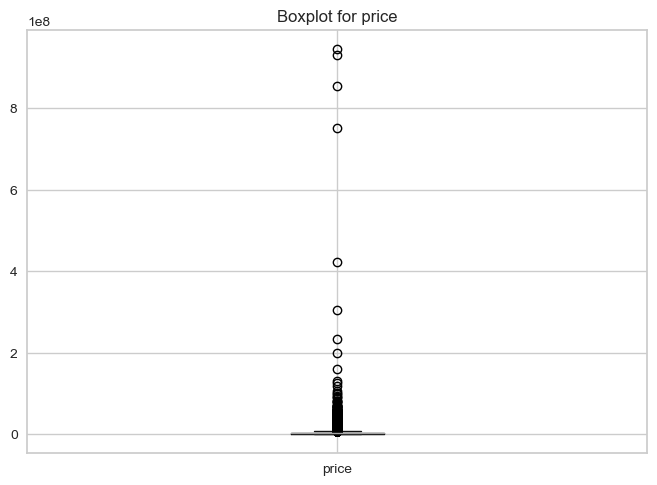

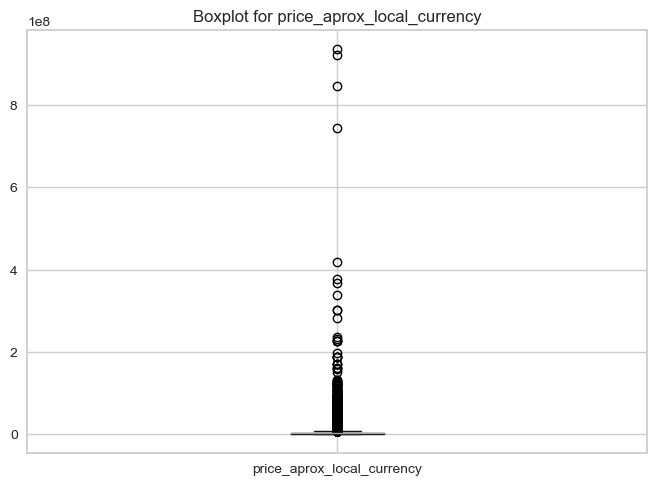

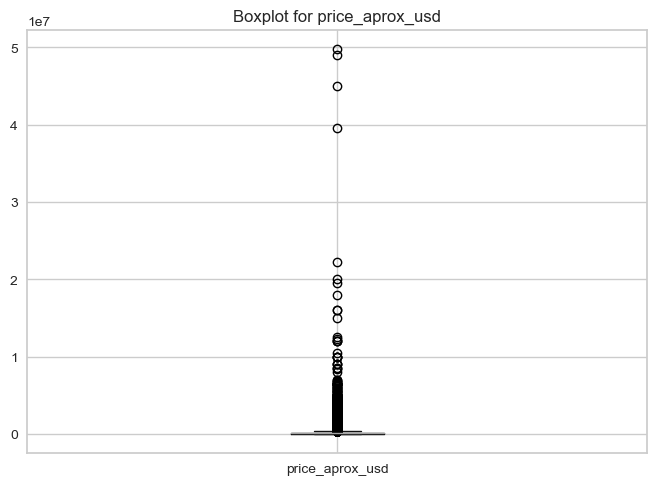

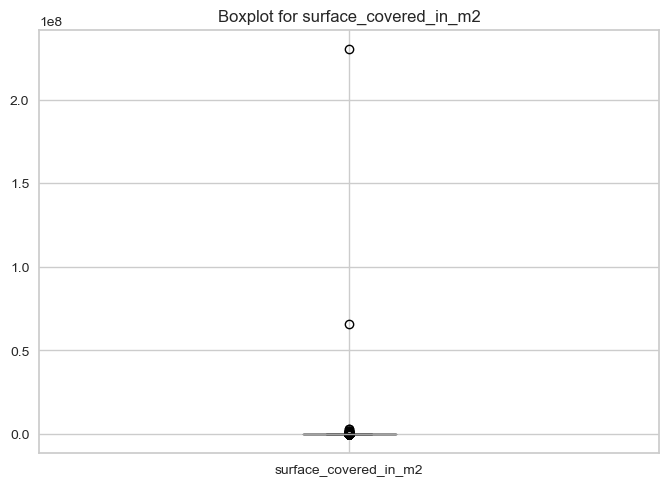

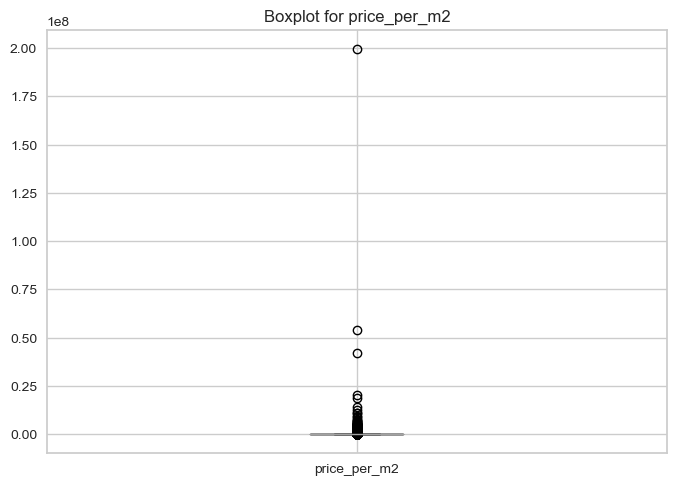

In [19]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure()
        df.boxplot(column=[column])
        plt.title('Boxplot for ' + column)
plt.show()

# machine learning 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167355 entries, 1 to 188524
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  167355 non-null  object 
 1   operation                   167355 non-null  object 
 2   property_type               167355 non-null  object 
 3   place_name                  167355 non-null  object 
 4   place_with_parent_names     167355 non-null  object 
 5   price                       167355 non-null  float64
 6   currency                    167355 non-null  object 
 7   price_aprox_local_currency  167355 non-null  float64
 8   price_aprox_usd             167355 non-null  float64
 9   surface_covered_in_m2       167355 non-null  float64
 10  price_per_m2                167355 non-null  float64
dtypes: float64(5), object(6)
memory usage: 15.3+ MB


In [21]:
encode_x = LabelEncoder()
df['operation'] = encode_x.fit_transform(df['operation'])
df['property_type'] = encode_x.fit_transform(df['property_type'])
df['place_name'] = encode_x.fit_transform(df['place_name'])
df['place_with_parent_names'] = encode_x.fit_transform(df['place_with_parent_names'])
df['currency'] = encode_x.fit_transform(df['currency'])
df['created_on'] = encode_x.fit_transform(df['created_on'])

In [22]:
x=df.drop(['price_aprox_usd'],axis=1)
y=df['price_aprox_usd']

In [23]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)


# Linear regression is a statistical method used to model the relationship between one or more independent variables and a dependent variable.

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)



y_pred1 = lr.predict(X_test)


# Random Forest Regressor is a machine learning algorithm that is commonly used for regression problems. It is an ensemble learning method that combines multiple decision trees to create a single, more accurate model.

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)


# Gradient Boosting Regressor is another popular machine learning algorithm used for regression problems. Like Random Forest, it is an ensemble learning method that combines multiple models to create a single, more accurate model.



In [26]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
y_pred4 = gr.predict(X_test)


In [27]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'rf':y_pred3,'gr':y_pred4})


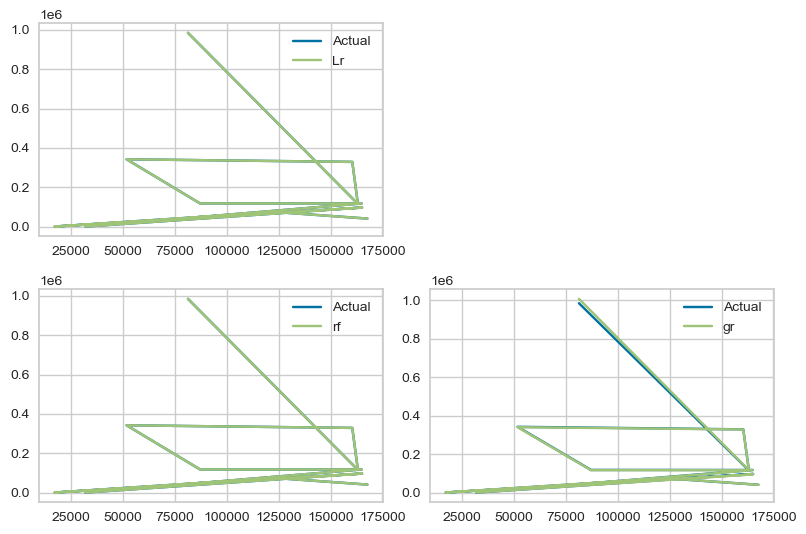

In [28]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

# metrics.r2_score, also known as the coefficient of determination, is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the proportion of variance in the target variable that is explained by the model.

In [30]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
print(score1,score3,score4)

1.0 0.9952422117809885 0.9844447122301867


In [31]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)
print(s1,s3,s4)


0.0001265863200372222 258.40971296367735 2923.974422384247


In [32]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_covered_in_m2', 'price_per_m2'],
      dtype='object')

## pycaret.regression is a Python library that provides a high-level interface for building and evaluating machine learning models for regression problems. It is built on top of popular machine learning libraries such as scikit-learn, XGBoost, and LightGBM, among others.

In [34]:
envo=setup(data=df,target='price_aprox_usd',session_id=123)

,Description,Value
0,Session id,123
1,Target,price_aprox_usd
2,Target type,Regression
3,Original data shape,"(167355, 11)"
4,Transformed data shape,"(167355, 11)"
5,Transformed train set shape,"(117148, 11)"
6,Transformed test set shape,"(50207, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [35]:
best=compare_models(exclude=["ransac"])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0044,0.0002,0.0142,1.0000,0.0000,0.0000,0.6140
par,Passive Aggressive Regressor,0.0367,0.0042,0.0602,1.0000,0.0000,0.0000,0.1320
llar,Lasso Least Angle Regression,0.0046,0.0002,0.0142,1.0000,0.0000,0.0000,0.1630
lasso,Lasso Regression,0.0208,0.0051,0.0678,1.0000,0.0000,0.0000,0.2650
br,Bayesian Ridge,0.0046,0.0002,0.0143,1.0000,0.0000,0.0000,0.1490
huber,Huber Regressor,0.0071,0.0003,0.0165,1.0000,0.0000,0.0000,0.1360
ridge,Ridge Regression,0.0044,0.0002,0.0142,1.0000,0.0000,0.0000,0.1340
lar,Least Angle Regression,0.0044,0.0002,0.0142,1.0000,0.0000,0.0000,0.1490
en,Elastic Net,0.0123,0.0016,0.0383,1.0000,0.0000,0.0000,0.1610
omp,Orthogonal Matching Pursuit,0.0045,0.0002,0.0137,1.0000,0.0000,0.0000,0.1570


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

### MAE stands for Mean Absolute Error, which is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the average absolute difference between the predicted values and the actual values.
### MSE stands for Mean Squared Error, which is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the average squared difference between the predicted values and the actual values.
### RMSE stands for Root Mean Squared Error, which is a commonly used metric for evaluating the performance of regression models in machine learning. It is similar to MSE but takes the square root of the average squared difference between the predicted values and the actual values.
### RMSLE stands for Root Mean Squared Logarithmic Error, which is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the ratio between the predicted and actual values, instead of the absolute difference between them.
### MAPE stands for Mean Absolute Percentage Error, which is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the average percentage difference between the predicted values and the actual values.
### R2, also known as the coefficient of determination, is a commonly used metric for evaluating the performance of regression models in machine learning. It measures the proportion of the variance in the target variable that is explained by the model.
### TT (Sec) stands for Total Time, which is the amount of time it takes to complete a task or process from start to finish. It is a commonly used metric in various fields, including software development, project management, and manufacturing, among others.

